In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Crop_recommendation.csv')

In [31]:
data.sample(10)

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label
1693,34,10,14,34.052969,92.058117,6.725601,116.802085,orange
620,13,47,20,29.217800,87.937242,6.544502,43.138663,mungbean
2157,115,31,30,24.229847,67.377684,6.840928,122.407342,coffee
2177,117,37,32,23.106938,67.062305,6.787659,162.576961,coffee
702,42,61,22,26.272744,62.288149,7.418651,70.232076,blackgram
131,63,43,19,18.518168,55.531281,6.641906,90.988051,maize
1174,26,24,34,31.271810,52.238102,6.811291,89.744090,mango
403,27,57,24,27.335349,43.357960,6.091863,142.330368,pigeonpeas
2059,61,41,44,24.369724,82.113198,6.537915,159.921093,jute
22,67,59,41,21.947667,80.973842,6.012633,213.356092,rice


In [3]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [4]:
data.rename(columns={'N': 'Nitrogen'}, inplace=True)

In [5]:
data.rename(columns={'P': 'Phosphorus'}, inplace=True)

In [6]:
data.rename(columns={'K': 'Potassium'}, inplace=True)

In [7]:
data.head

<bound method NDFrame.head of       Nitrogen  Phosphorus  Potassium  temperature   humidity        ph  \
0           90          42         43    20.879744  82.002744  6.502985   
1           85          58         41    21.770462  80.319644  7.038096   
2           60          55         44    23.004459  82.320763  7.840207   
3           74          35         40    26.491096  80.158363  6.980401   
4           78          42         42    20.130175  81.604873  7.628473   
...        ...         ...        ...          ...        ...       ...   
2195       107          34         32    26.774637  66.413269  6.780064   
2196        99          15         27    27.417112  56.636362  6.086922   
2197       118          33         30    24.131797  67.225123  6.362608   
2198       117          32         34    26.272418  52.127394  6.758793   
2199       104          18         30    23.603016  60.396475  6.779833   

        rainfall   label  
0     202.935536    rice  
1     226.65553

In [8]:
data[data.isnull().any(axis=1)].head()

,Nitrogen,Phosphorus,Potassium,temperature,humidity,ph,rainfall,label


In [9]:
before_rows = data.shape[0]

In [10]:
print(before_rows)

2200


In [11]:
data = data.dropna()

In [12]:
after_rows = data.shape[0]

In [13]:
print(after_rows)

2200


In [14]:
before_rows - after_rows

0

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.metrics import accuracy_score

In [16]:
X = data.drop('label', axis=1)
y = data['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
model = RandomForestClassifier(random_state=42)

In [19]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.5f}")

Model Accuracy: 0.99091


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

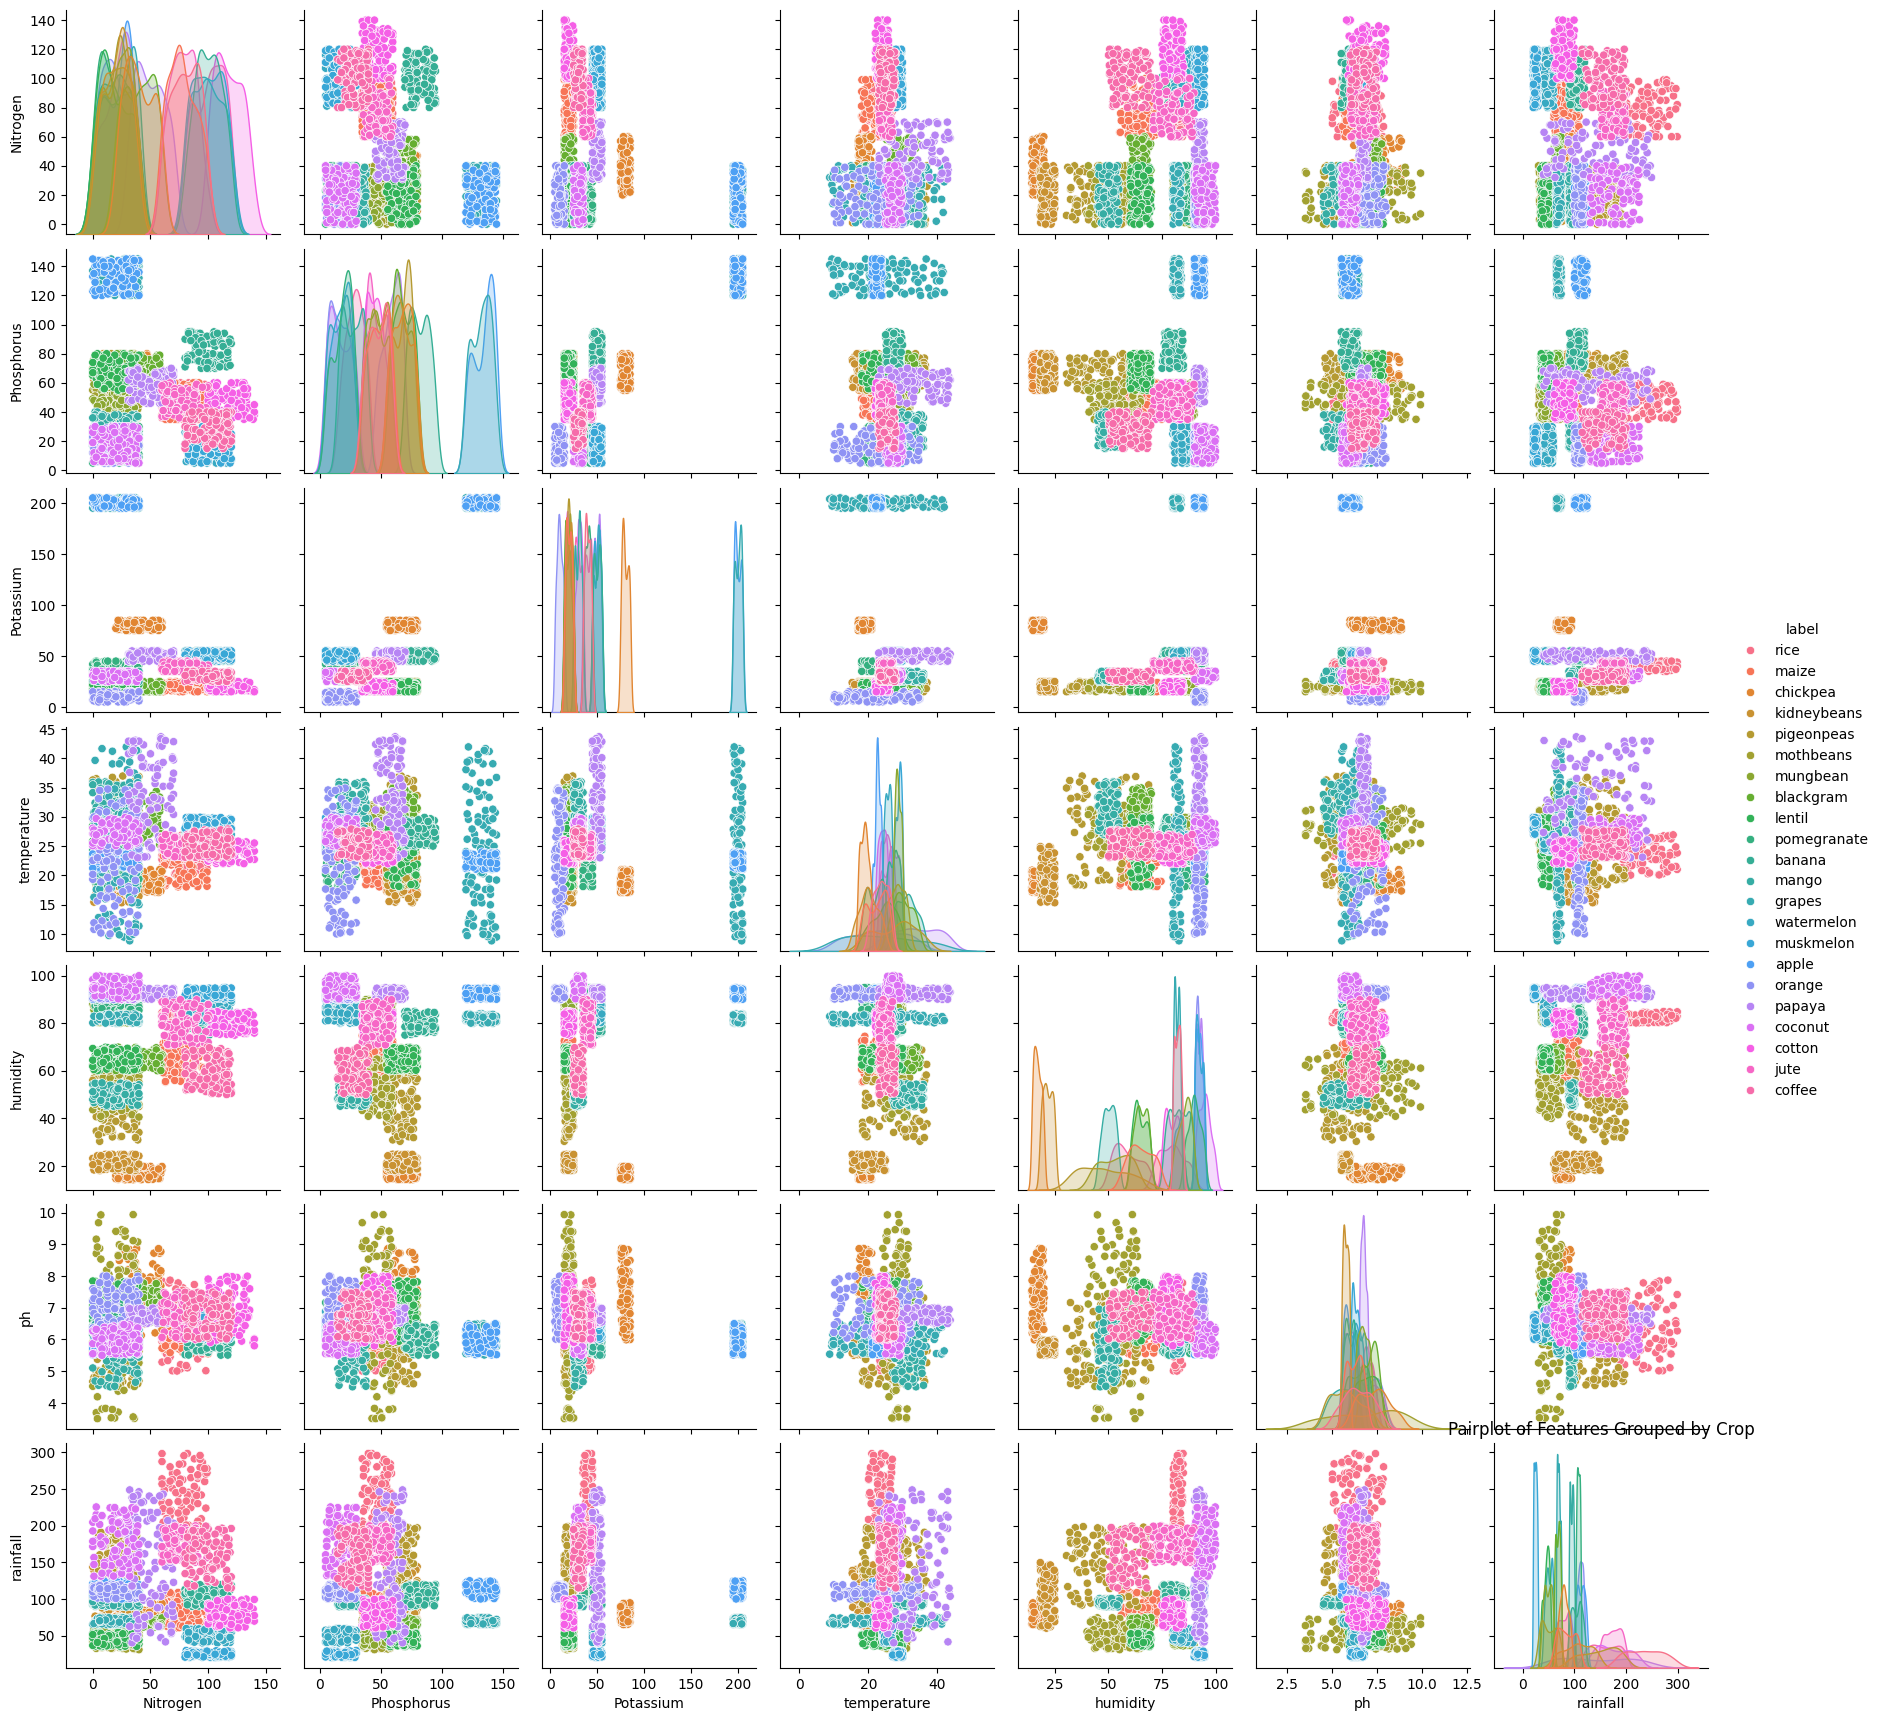

In [23]:
sns.pairplot(data, hue='label', diag_kind='kde')
plt.title("Pairplot of Features Grouped by Crop")
plt.show()

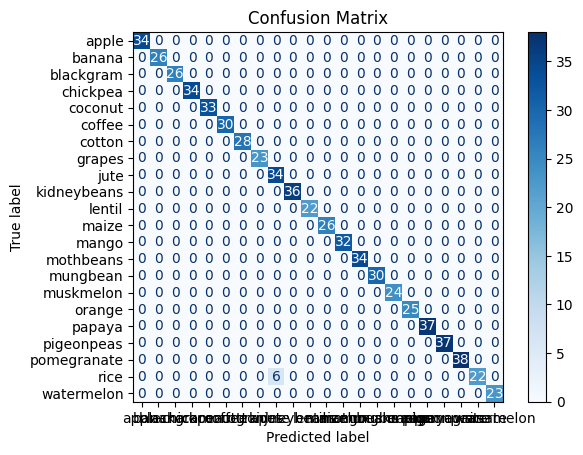

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix")
plt.show()

In [25]:
# plt.figure(figsize=(8, 6))
# sns.barplot(x=feature_importances, y=features)
# plt.title("Feature Importance")
# plt.xlabel("Importance")
# plt.ylabel("Features")
# plt.show()

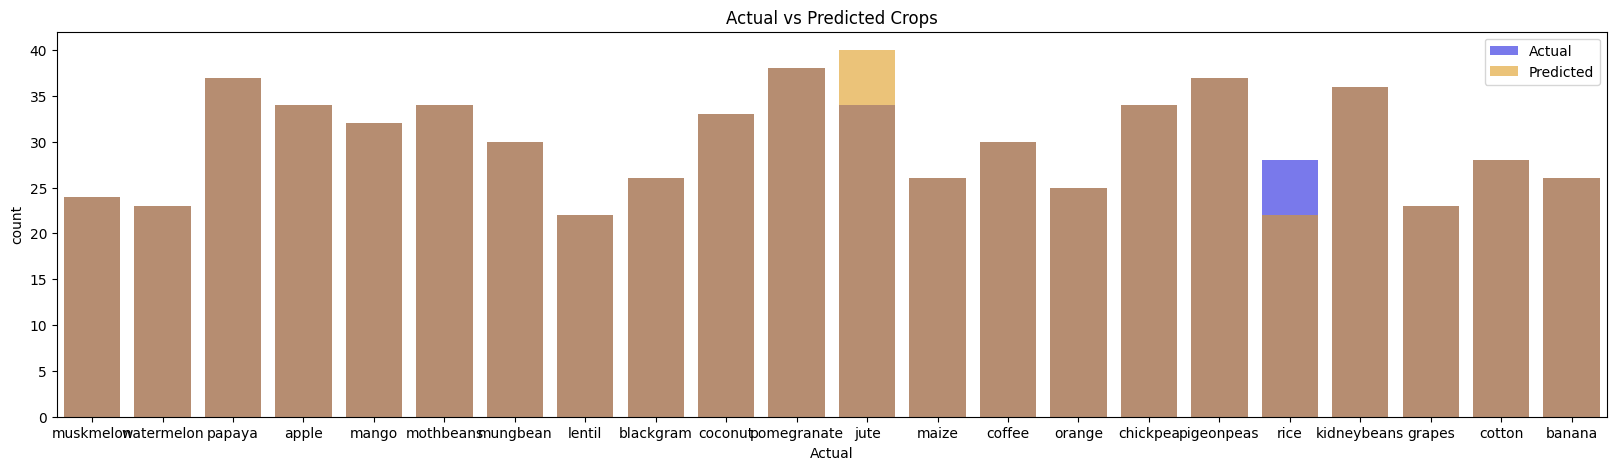

In [26]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(20, 5))
sns.countplot(x='Actual', data=results, label='Actual', color='blue', alpha=0.6)
sns.countplot(x='Predicted', data=results, label='Predicted', color='orange', alpha=0.6)
plt.title("Actual vs Predicted Crops")
plt.legend()
plt.show()

In [27]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [28]:
import pandas as pd

# Load dataset
df = pd.read_csv("Crop_recommendation.csv")

# Parameters to consider
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Dictionary to hold ranges per crop
crop_ranges_95 = {}

# For each unique crop
for crop in df['label'].unique():
    crop_data = df[df['label'] == crop]
    crop_ranges_95[crop] = {}
    
    for feature in features:
        mean = crop_data[feature].mean()
        std = crop_data[feature].std()
        min_val = round(mean - 2 * std, 2)
        max_val = round(mean + 2 * std, 2)
        crop_ranges_95[crop][feature] = [min_val, max_val]

# Display the result
import pprint
pprint.pprint(crop_ranges_95)


{'apple': {'K': [193.25, 206.53],
           'N': [-2.93, 44.53],
           'P': [117.94, 150.5],
           'humidity': [89.42, 95.25],
           'ph': [5.39, 6.47],
           'rainfall': [98.45, 126.86],
           'temperature': [20.98, 24.29]},
 'banana': {'K': [43.28, 56.82],
            'N': [78.02, 122.44],
            'P': [66.63, 97.39],
            'humidity': [74.75, 85.97],
            'ph': [5.44, 6.53],
            'rainfall': [85.83, 123.42],
            'temperature': [24.52, 30.23]},
 'blackgram': {'K': [12.86, 25.62],
               'N': [14.69, 65.35],
               'P': [53.17, 81.77],
               'humidity': [59.52, 70.72],
               'ph': [6.39, 7.88],
               'rainfall': [59.52, 76.25],
               'temperature': [24.6, 35.35]},
 'chickpea': {'K': [73.4, 86.44],
              'N': [15.79, 64.39],
              'P': [52.79, 82.79],
              'humidity': [13.44, 20.28],
              'ph': [5.73, 8.94],
              'rainfall': [64.17, 95

In [29]:
import random

def generate_crop_reasoning(crop_name, user_input, crop_ranges_95):
    reasoning = []
    
    crop_range = crop_ranges_95.get(crop_name)
    if not crop_range:
        return f"No range data found for {crop_name}"
    
    for feature, value in user_input.items():
        if feature not in crop_range:
            continue
        low, high = crop_range[feature]
        param = feature.upper()

        if low <= value <= high:
            messages = [
                f"✔️ {param} value of {value} is perfect for {crop_name}, matching the ideal range of {low}–{high}.",
                f"✅ Your {param} level ({value}) aligns well with what's needed for growing {crop_name} efficiently.",
                f"👍 The {param} value is within the optimal range for {crop_name} — great for healthy crop growth!"
            ]
        elif value < low:
            messages = [
                f"⚠️ {param} value of {value} is a bit low for {crop_name} (ideal: {low}–{high}). Consider boosting it slightly.",
                f"🧪 Low {param} might reduce {crop_name} yield. Aim for {low}–{high} to improve performance.",
                f"🔻 Your {param} level is below the healthy range for {crop_name}. It may struggle unless corrected."
            ]
        else:  # value > high
            messages = [
                f"⚠️ {param} value of {value} is higher than optimal for {crop_name} (ideal: {low}–{high}).",
                f"🔺 Excess {param} may cause imbalance for {crop_name}. Try adjusting closer to {low}–{high}.",
                f"⚡ High {param} could harm {crop_name} productivity. Recommended range is {low}–{high}."
            ]
        
        reasoning.append(random.choice(messages))

    return "\n".join(reasoning)


In [30]:
user_input = {
    "N": 90,
    "P": 42,
    "K": 43,
    "temperature": 20.8,
    "humidity": 82.0,
    "ph": 6.5,
    "rainfall": 202.9
}

predicted_crop = "apple"
print(f"\n🌱 Recommendation Reason for '{predicted_crop.upper()}':\n")
print(generate_crop_reasoning(predicted_crop, user_input, crop_ranges_95))



🌱 Recommendation Reason for 'APPLE':

🔺 Excess N may cause imbalance for apple. Try adjusting closer to -2.93–44.53.
🧪 Low P might reduce apple yield. Aim for 117.94–150.5 to improve performance.
🧪 Low K might reduce apple yield. Aim for 193.25–206.53 to improve performance.
🧪 Low TEMPERATURE might reduce apple yield. Aim for 20.98–24.29 to improve performance.
🔻 Your HUMIDITY level is below the healthy range for apple. It may struggle unless corrected.
⚡ High PH could harm apple productivity. Recommended range is 5.39–6.47.
🔺 Excess RAINFALL may cause imbalance for apple. Try adjusting closer to 98.45–126.86.
